In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged/mergedData.csv


In [21]:
df = pd.read_csv("/kaggle/input/merged/mergedData.csv")
df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,...,data52,data53,data54,data55,data56,data57,data58,data59,data60,result
0,-1.160,75.012,-461.548,-44.678,35.339,-324.463,-56.519,2.686,-249.145,-40.955,...,-0.244,-11.414,30.457,-5.737,-5.005,24.048,-9.338,-2.014,25.696,down
1,-45.105,13.123,-210.693,-34.119,-10.254,-112.061,-10.559,-16.357,-54.871,16.113,...,-6.287,-11.047,50.293,-13.000,-3.540,43.274,-15.198,-1.404,40.039,down
2,-43.274,14.709,-248.657,-10.681,-23.315,-104.065,22.400,-27.405,-38.025,42.969,...,-15.137,1.770,47.729,-16.235,2.930,45.654,-11.169,2.502,47.729,down
3,-13.550,13.306,-197.021,-1.648,-12.329,-98.022,11.169,-13.672,-50.903,18.433,...,-20.752,-2.014,52.002,-15.808,-3.540,43.884,-13.672,-2.136,41.199,down
4,-39.917,9.888,-230.530,-9.521,-28.870,-98.633,18.616,-29.297,-28.564,30.151,...,-16.174,-4.395,60.608,-6.531,-12.756,61.157,-5.981,-13.306,59.143,down


In [22]:
X = df.drop('result',axis='columns')
X.head()


,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,...,data51,data52,data53,data54,data55,data56,data57,data58,data59,data60
0,-1.160,75.012,-461.548,-44.678,35.339,-324.463,-56.519,2.686,-249.145,-40.955,...,40.649,-0.244,-11.414,30.457,-5.737,-5.005,24.048,-9.338,-2.014,25.696
1,-45.105,13.123,-210.693,-34.119,-10.254,-112.061,-10.559,-16.357,-54.871,16.113,...,55.115,-6.287,-11.047,50.293,-13.000,-3.540,43.274,-15.198,-1.404,40.039
2,-43.274,14.709,-248.657,-10.681,-23.315,-104.065,22.400,-27.405,-38.025,42.969,...,52.185,-15.137,1.770,47.729,-16.235,2.930,45.654,-11.169,2.502,47.729
3,-13.550,13.306,-197.021,-1.648,-12.329,-98.022,11.169,-13.672,-50.903,18.433,...,58.472,-20.752,-2.014,52.002,-15.808,-3.540,43.884,-13.672,-2.136,41.199
4,-39.917,9.888,-230.530,-9.521,-28.870,-98.633,18.616,-29.297,-28.564,30.151,...,61.218,-16.174,-4.395,60.608,-6.531,-12.756,61.157,-5.981,-13.306,59.143


# converting categorical data into numerical data

In [23]:
y = pd.get_dummies(df.result).astype('int64')
y

,down,left,right,up
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
3071,0,0,1,0
3072,0,0,1,0
3073,0,0,1,0
3074,0,0,1,0


# testing and training data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_test

,down,left,right,up
2766,0,0,1,0
1213,0,0,0,1
1079,0,0,0,1
2771,0,0,1,0
2102,0,1,0,0
...,...,...,...,...
1603,0,1,0,0
2390,0,0,1,0
2650,0,0,1,0
1304,0,0,0,1


# fitting into a model to check accuracy

In [38]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
model = MultiOutputClassifier(DecisionTreeClassifier())
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [39]:
model.score(X_test,y_test)

0.9935064935064936

Confusion Matrix for target1:
[[462   1]
 [  1 152]]
Confusion Matrix for target2:
[[467   0]
 [  2 147]]
Confusion Matrix for target3:
[[436   0]
 [  0 180]]
Confusion Matrix for target4:
[[481   1]
 [  0 134]]


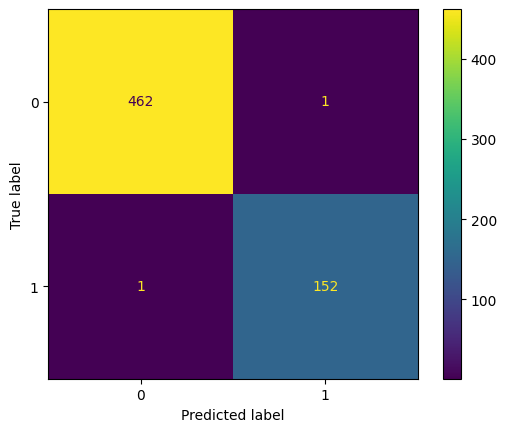

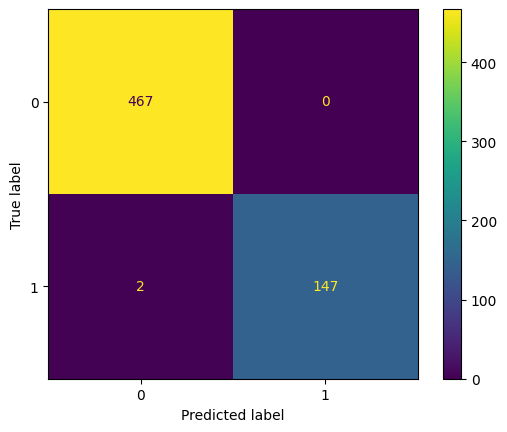

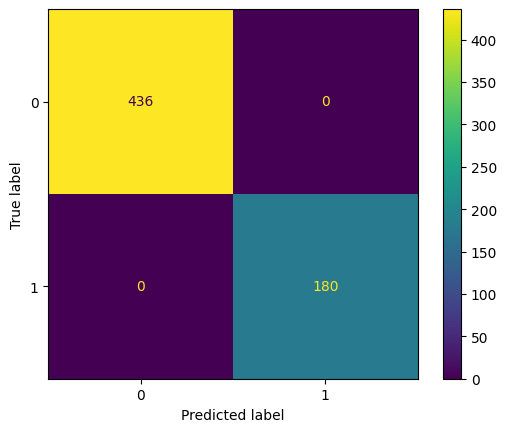

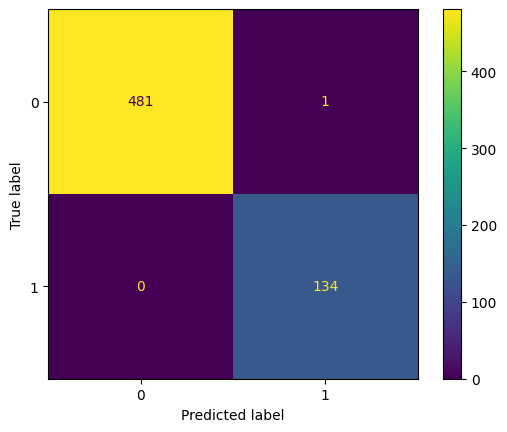

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = multilabel_confusion_matrix(y_test, y_pred)
for idx, matrix in enumerate(cm):
    print(f"Confusion Matrix for target{idx+1}:")
    print(matrix)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    cm_disp.plot()

# checking with other models

In [45]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
model2.score(X_test,y_test)
y_pred

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [53]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,['y_train'])
model3.score(X_test,['y_test'])


ValueError: Found input variables with inconsistent numbers of samples: [2460, 1]